In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data sets from Excel
Jobmarket02 = pd.read_excel(
    r'C:\Users\analy\Documents\German 2025 Job Market Analysis\02 Data\Original\Job Market Germany data set.xlsx'
)


# Pivote Tables: Cross-Tabulations (Grouped Descriptive Stats)

### Number of Openings Trends among job title, industry and months of the year

In [5]:
# Pivote table to look at the job titles and opening numbers
jobtitle_openings = pd.pivot_table(
    Jobmarket02,
    index='job_title',                # rows = unique job titles
    values=['number_of_openings', 'competitiveness_score','salary_median_eur'],  # columns to summarize
    aggfunc={'number_of_openings':'sum', 'competitiveness_score':'mean','salary_median_eur':'mean'}  # aggregation functions
)
# Sort by number_of_openings (sum) in descending order
jobtitle_openings = jobtitle_openings.sort_values(by='number_of_openings', ascending=False)

In [19]:
jobtitle_openings

,competitiveness_score,number_of_openings,salary_median_eur
job_title,,,
Marketing Manager,53.042142,52927,65432.247042
Teacher,52.746817,51873,49274.050633
Product Manager,52.617795,50421,96413.774988
Customer Support,52.931224,49947,37788.549461
Data Scientist,52.911894,49873,79208.886986
Business Analyst,52.990309,49347,70007.261194
HR Manager,52.681246,49306,64429.356008
DevOps Engineer,53.209430,49247,85912.296259
Software Engineer,52.618233,49102,72249.682717


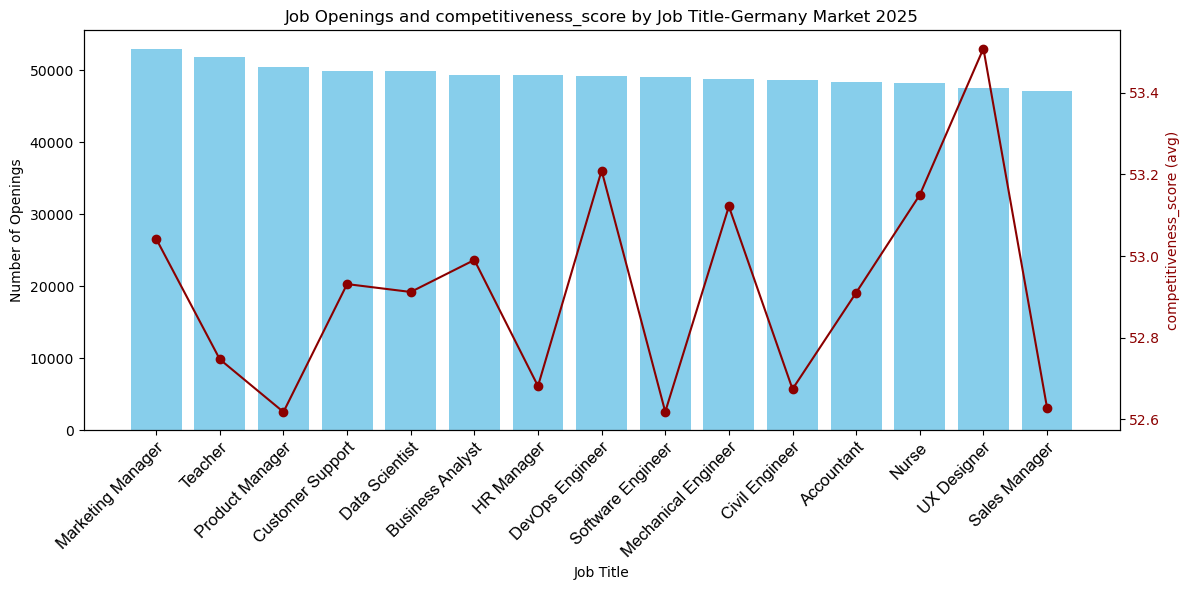

In [24]:
# Create figure and axis Job Openings vs competitiveness_score by Job Title-Germany Market 2025
jobtitle_openings_fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for number_of_openings
ax1.bar(jobtitle_openings.index, jobtitle_openings['number_of_openings'],color='skyblue')
ax1.set_xlabel('Job Title')
ax1.set_ylabel('Number of Openings', color='black')
ax1.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor',fontsize=12, fontname='Arial')  # rotate job titles for readability and anchor it to the center

# Create second axis for demand_index
ax2 = ax1.twinx()
ax2.plot(jobtitle_openings.index, jobtitle_openings['competitiveness_score'], color='darkred', marker='o')
ax2.set_ylabel('competitiveness_score (avg)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title('Job Openings and competitiveness_score by Job Title-Germany Market 2025')
plt.tight_layout()

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\demand by job title bar chart.png",
            dpi=600, bbox_inches='tight')
plt.show()

bar graph showing the number of job openings across the job titles in 2025. showing no remarkable differences, but the highest is the Marketing Manager and the lowest is Sales Manage. however, the competitiveness score show very distinct average. UX Designer has the highest score while the Product and Sales manegers are the lowest.

In [10]:
# Pivote table to look at the industry and opening numbers
Industry_openings = pd.pivot_table(
    Jobmarket02,
    index='industry',                # rows = unique job titles
    values=['number_of_openings', 'demand_index','salary_median_eur'],  # columns to summarize
    aggfunc={'number_of_openings':'sum', 'demand_index':'mean','salary_median_eur':'mean'}  # aggregation functions
)
# Sort by number_of_openings (sum) in descending order
Industry_openings = Industry_openings.sort_values(by='number_of_openings', ascending=False)

In [9]:
Industry_openings

,demand_index,number_of_openings,salary_median_eur
industry,,,
IT,69.006333,198643,83511.998013
Marketing,69.443445,52927,65432.247042
Education,68.915287,51873,49274.050633
Services,69.050930,49947,37788.549461
Business,69.068657,49347,70007.261194
HR,68.678252,49306,64429.356008
Engineering,69.622699,48873,61191.736196
Construction,68.691118,48636,60331.615269
Finance,69.219814,48418,53373.885449


In [ ]:
# Create figure and axis Job Openings vs competitiveness_score by Job Title-Germany Market 2025
Industry_openings_fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for number_of_openings
ax1.bar(Industry_openings.index, Industry_openings['number_of_openings'], color='skyblue')
ax1.set_xlabel('Industry')
ax1.set_ylabel('Number of Openings', color='black')
ax1.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor',fontsize=12, fontname='Arial')  # rotate job titles for readability and anchor it to the center

# Create second axis for demand_index
ax2 = ax1.twinx()
ax2.plot(Industry_openings.index, Industry_openings['demand_index'], color='darkred', marker='o')
ax2.set_ylabel('demand_index (avg)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title('industry Openings and competitiveness_score by Job Title-Germany Market 2025')
plt.tight_layout()

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\demand by industry bar chart.png",
            dpi=600, bbox_inches='tight')
plt.show()

bar graph showing the number of job openings across the Industry in 2025. showing no differences between all industries except of the IT that has 4 times higher job openings. in parallel, the demand index average per industry is not stable as th eopenings number. in contrary to that, the average demand index show very distinct picture. there is vey high demand to the design/ IT industry followed by the Engineering. this rais the question, why there is no correlation between number of job openings and the demand index?


In [16]:
# Pivote table to look at the monthly trends of opening numbers
monthly_demand = pd.pivot_table(
    Jobmarket02,
    index=['month','month_name'],         
    values=['number_of_openings', 'demand_index','competitiveness_score','salary_median_eur'],  # columns to summarize
    aggfunc={'number_of_openings':'sum', 'demand_index':'mean', 'competitiveness_score':'mean', 'salary_median_eur':'mean'} # aggregation functions
)
# Reset index so we can sort easily
monthly_demand = monthly_demand.reset_index()

# Sort by month number to get ascending order (1–12)
monthly_demand = monthly_demand.sort_values(by='month')

In [17]:
monthly_demand

,month,month_name,competitiveness_score,demand_index,number_of_openings,salary_median_eur
0,1,Jan,52.580824,68.591821,62514,65650.398348
1,2,Feb,52.550043,68.678138,60883,65839.067611
2,3,Mar,52.859791,69.166996,62994,65504.896171
3,4,Apr,53.072876,69.475264,60894,66207.362125
4,5,May,53.128956,69.268000,61314,66729.754400
5,6,Jun,53.009564,69.293856,61143,65055.765562
6,7,Jul,52.663751,68.613547,62310,65772.823806
7,8,Aug,52.932828,69.019070,62130,64574.847437
8,9,Sep,52.955097,69.143263,60835,63610.437094
9,10,Oct,53.139698,69.304488,61385,63009.104327


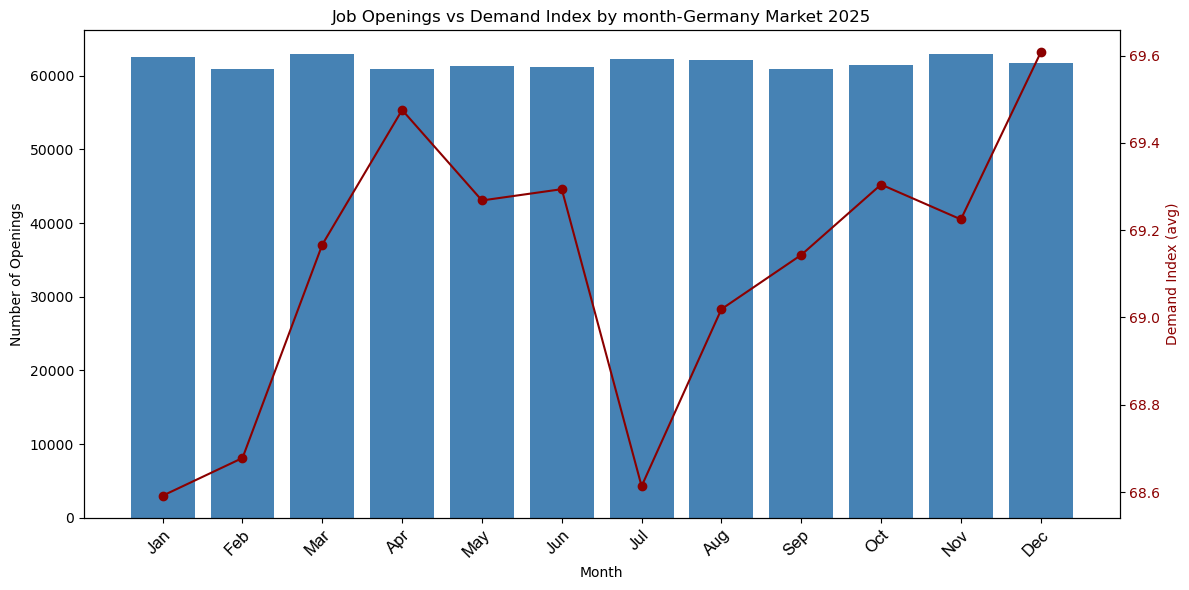

In [24]:
# Create figure and axis of monthly openings
monthly_demand_fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for number_of_openings
ax1.bar(monthly_demand['month_name'], monthly_demand['number_of_openings'], color='SteelBlue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Openings', color='black')
ax1.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor',fontsize=12, fontname='Arial')  # rotate job titles for readability and anchor it to the center

# Create second axis for demand_index
ax2 = ax1.twinx()
ax2.plot(monthly_demand.index, monthly_demand['demand_index'], color='darkred', marker='o')
ax2.set_ylabel('Demand Index (avg)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title('Job Openings vs Demand Index by month-Germany Market 2025')
plt.tight_layout()

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\monthly demand bar chart.png",
            dpi=600, bbox_inches='tight')
plt.show()


bar graph of showing the number of job openings or offers over the 2025 months. showing no remarkable differences, however, the demand index show very distinct average. April and December are the highest in job demand index while January and July are the lowest.

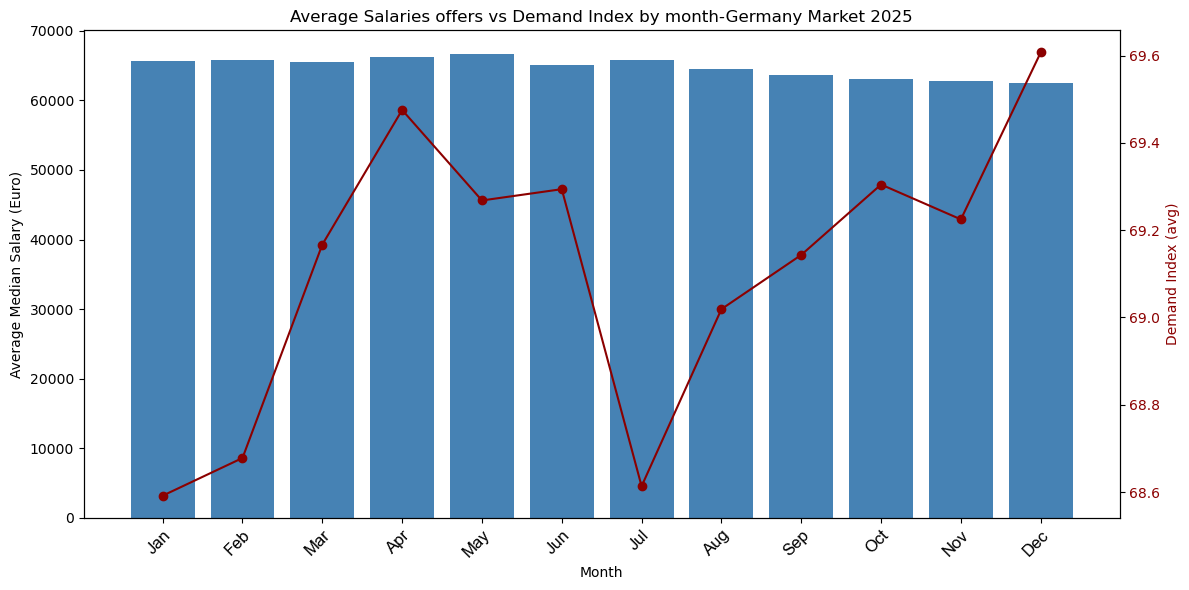

In [25]:
# Create figure and axis of monthly salaries
monthly_demand_fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for number_of_openings
ax1.bar(monthly_demand['month_name'], monthly_demand['salary_median_eur'], color='steelblue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Median Salary (Euro)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor',fontsize=12, fontname='Arial')  # rotate job titles for readability and anchor it to the center

# Create second axis for demand_index
ax2 = ax1.twinx()
ax2.plot(monthly_demand.index, monthly_demand['demand_index'], color='darkred', marker='o')
ax2.set_ylabel('Demand Index (avg)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title('Average Salaries offers vs Demand Index by month-Germany Market 2025')
plt.tight_layout()

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\monthly salaries offer bar chart.png",
            dpi=600, bbox_inches='tight')
plt.show()


C:\Users\analy\AppData\Local\Temp\ipykernel_25412\1222242974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


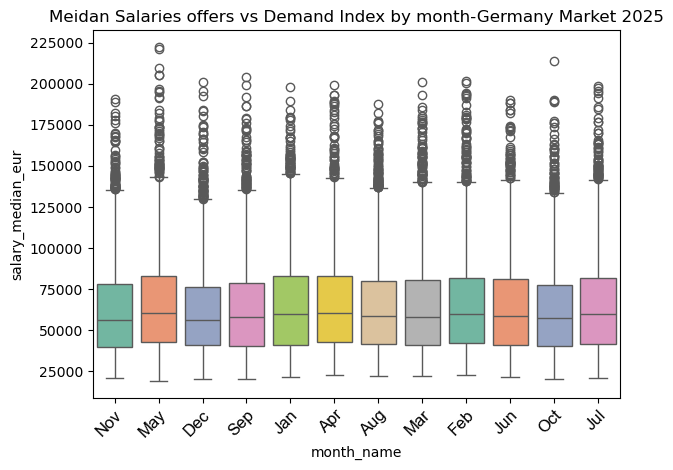

In [28]:
# Create figure and axis of monthly salaries
sns.boxplot(
    x="month_name", 
    y="salary_median_eur", 
    data=Jobmarket02, 
    palette="Set2" 
)

# Bar chart for number_of_openings
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Median Salary (Euro)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor',fontsize=12, fontname='Arial') 

plt.title('Meidan Salaries offers vs Demand Index by month-Germany Market 2025')
plt.tight_layout()

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\monthly salaries offer bar chart.png",
            dpi=600, bbox_inches='tight')
plt.show()


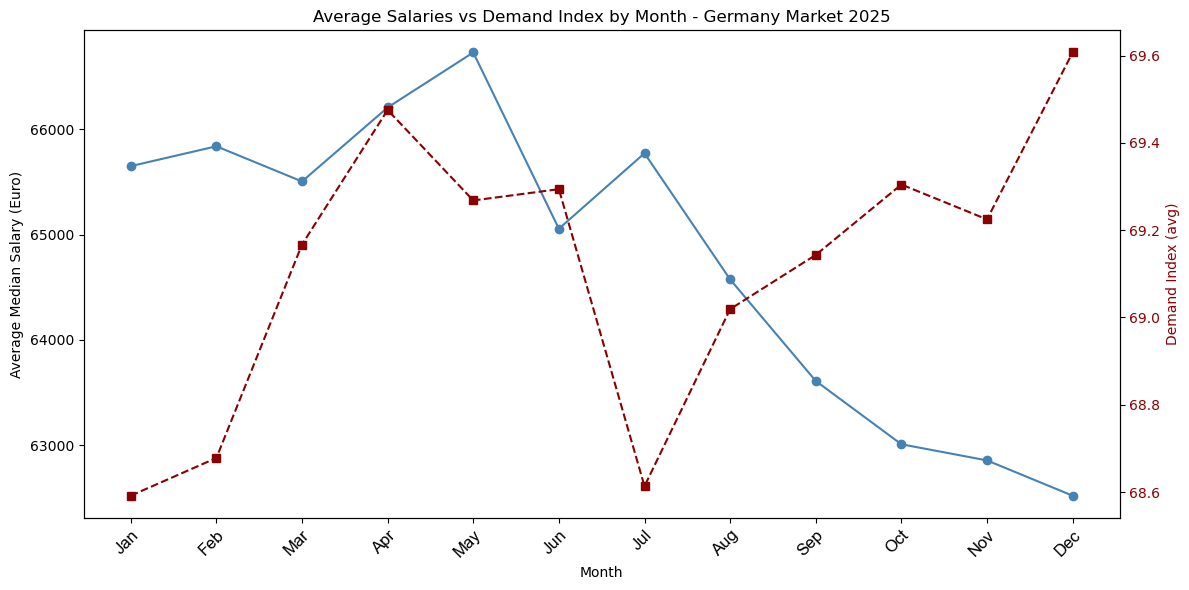

In [29]:
# Create figure and axis of monthly salaries
monthly_demand_fig, ax1 = plt.subplots(figsize=(12,6))

# Line chart for average median salary
ax1.plot(monthly_demand['month_name'], 
         monthly_demand['salary_median_eur'], 
         color='steelblue', marker='o', linestyle='-')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Median Salary (Euro)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=12, fontname='Arial')

# Create second axis for demand_index
ax2 = ax1.twinx()
ax2.plot(monthly_demand['month_name'], 
         monthly_demand['demand_index'], 
         color='darkred', marker='s', linestyle='--')
ax2.set_ylabel('Demand Index (avg)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Title and layout
plt.title('Average Salaries vs Demand Index by Month - Germany Market 2025')
plt.tight_layout()

# Save plot
plt.savefig(r"C:\\Users\\analy\\Documents\\German 2025 Job Market Analysis\\04 Analysis\\monthly_salaries_linechart.png",
            dpi=600, bbox_inches='tight')

# Show plot
plt.show()


### Salaries Trends among job titles and industry across Months and experience level

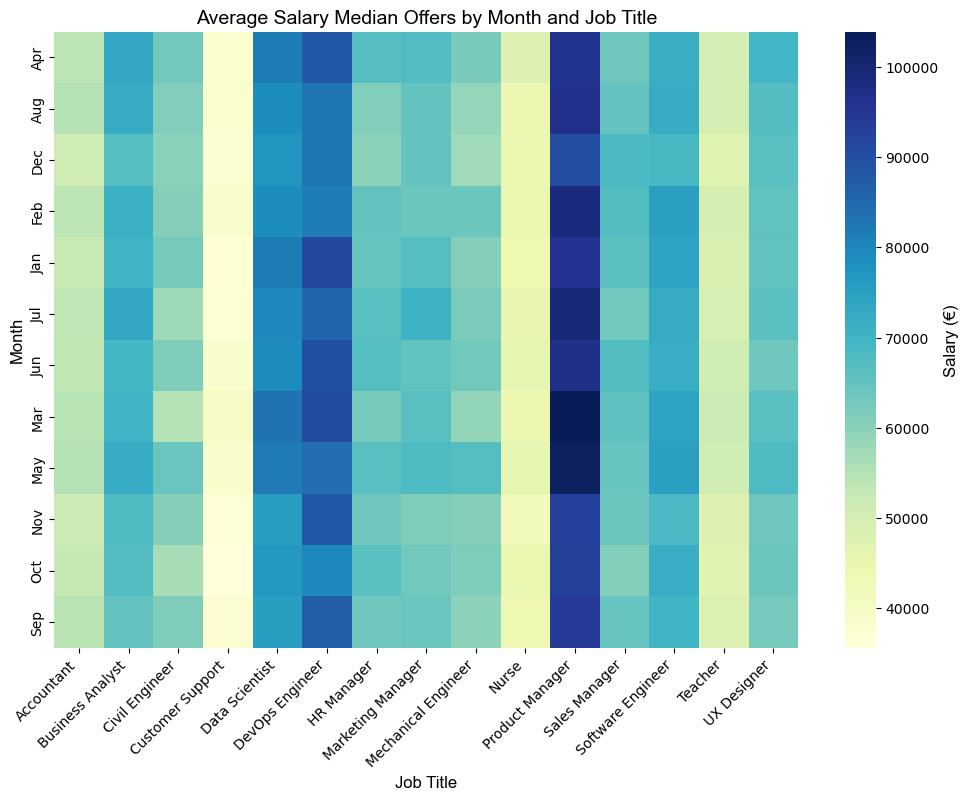

In [11]:
# Pivot table to look at salary median by job title across months displayed by heatmap
salary_matrix = pd.pivot_table(
    Jobmarket02,
    index='month_name',
    columns='job_title',
    values='salary_median_eur',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12,8))
ax= sns.heatmap(salary_matrix, cmap='YlGnBu', annot=False, fmt=".0f")
plt.title("Average Salary Median Offers by Month and Job Title", fontsize=14, fontname='Arial')
plt.xlabel("Job Title", fontsize=12, fontname='Arial')
plt.ylabel("Month", fontsize=12, fontname='Arial')
plt.xticks(rotation=45, ha='right')

# Add Euro label to the color scale
colorbar = ax.collections[0].colorbar
colorbar.set_label("Salary (€)", fontsize=12, fontname='Arial')

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\monthly salary by Jobtitle_heatmap.png",
            dpi=600, bbox_inches='tight')
plt.show()


Heatmap fo average salaries median offers across months and job titles show main differences across job titles and vey minor changes across months. the highest salaries over all months is for the job title Project Manager followed by DevOps Engineer and Data Scientist. while the lowest salaries are for Customer Support, followed by Nurse and Teacher.

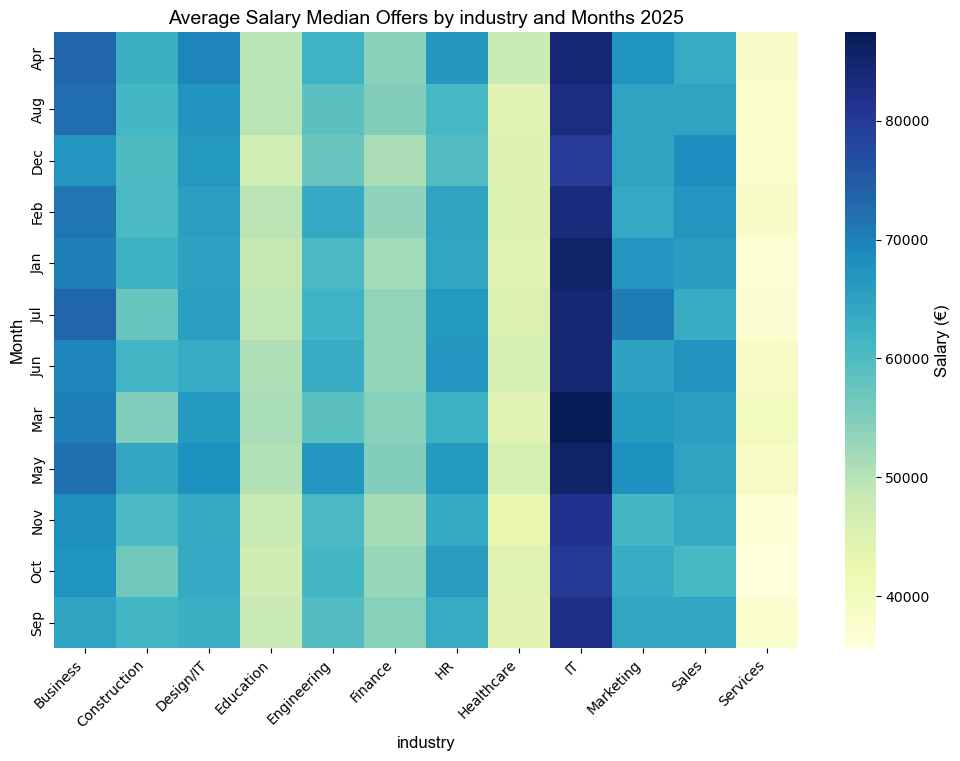

In [26]:
# Pivot table to look at salary median by industry across months displayed by heatmap
salary_matrix = pd.pivot_table(
    Jobmarket02,
    index='month_name',
    columns='industry',
    values='salary_median_eur',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12,8))
ax= sns.heatmap(salary_matrix, cmap='YlGnBu', annot=False, fmt=".0f")
plt.title("Average Salary Median Offers by industry and Months 2025", fontsize=14, fontname='Arial')
plt.xlabel("industry", fontsize=12, fontname='Arial')
plt.ylabel("Month", fontsize=12, fontname='Arial')
plt.xticks(rotation=45, ha='right')

# Add Euro label to the color scale
colorbar = ax.collections[0].colorbar
colorbar.set_label("Salary (€)", fontsize=12, fontname='Arial')

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\monthly salary by Industry_heatmap.png",
            dpi=600, bbox_inches='tight')
plt.show()


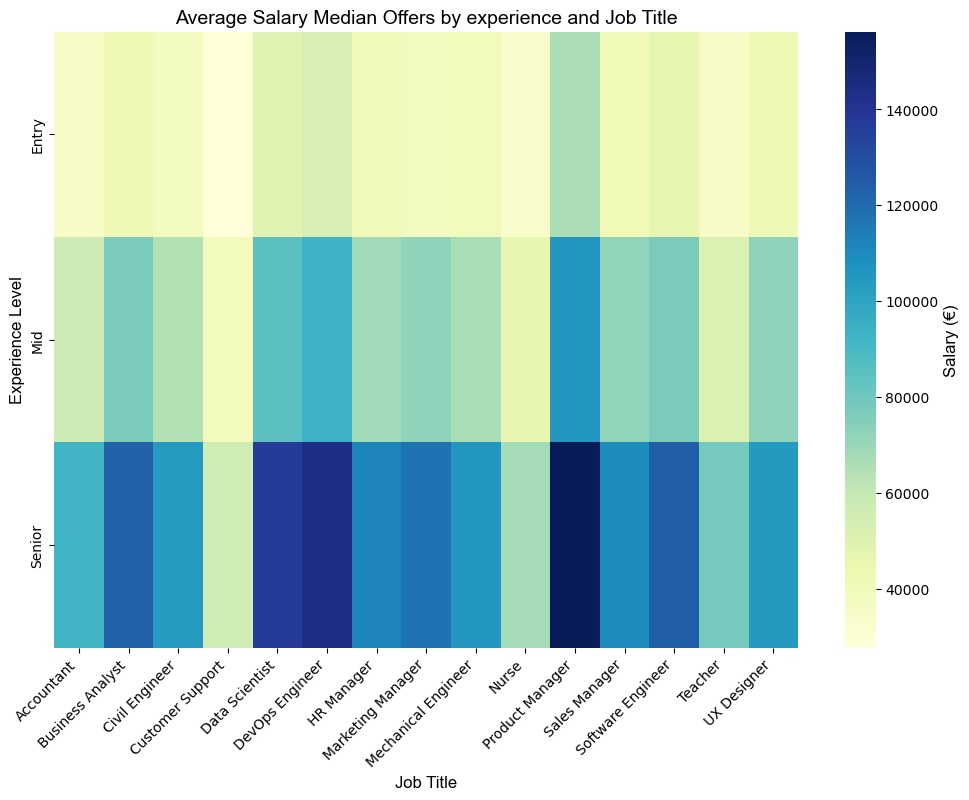

In [28]:
# Pivot table to look at salary median across experience level and job titles displayed by heatmap
salary_matrix2 = pd.pivot_table(
    Jobmarket02,
    index='experience_level',
    columns='job_title',
    values='salary_median_eur',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12,8))
ax= sns.heatmap(salary_matrix2, cmap='YlGnBu', annot=False, fmt=".0f")
plt.title("Average Salary Median Offers by experience and Job Title", fontsize=14, fontname='Arial')
plt.xlabel("Job Title", fontsize=12, fontname='Arial')
plt.ylabel("Experience Level", fontsize=12, fontname='Arial')
plt.xticks(rotation=45, ha='right')

# Add Euro label to the color scale
colorbar = ax.collections[0].colorbar
colorbar.set_label("Salary (€)", fontsize=12, fontname='Arial')

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\salary_Ex_heatmap.png",
            dpi=600, bbox_inches='tight')
plt.show()


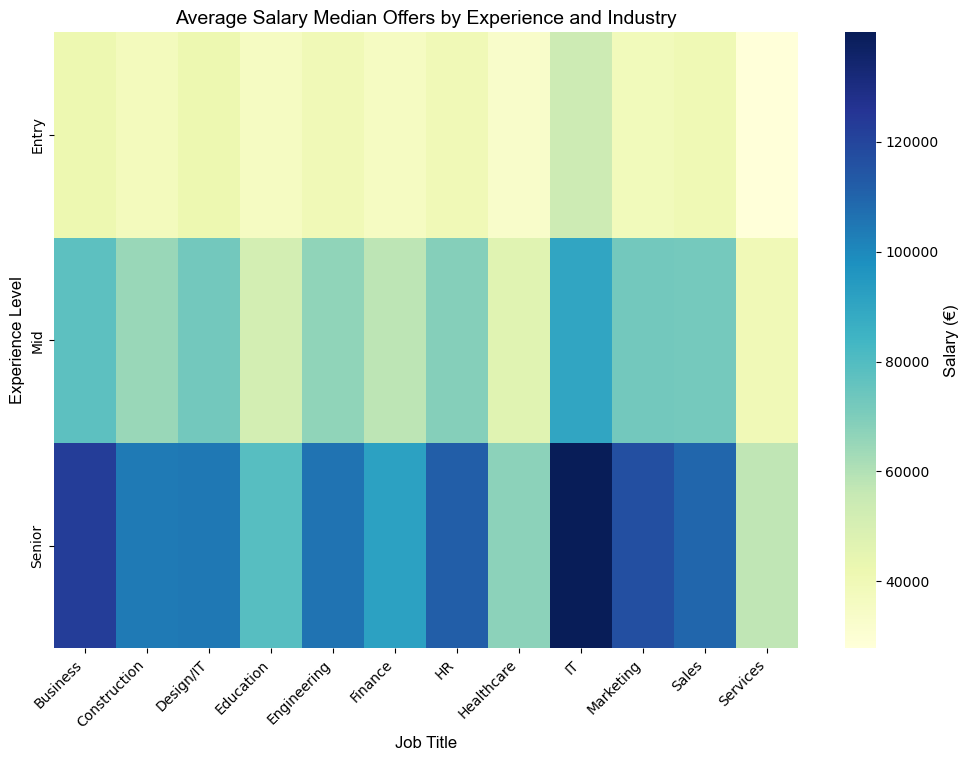

In [29]:
# Pivot table to look at salary median across experience level and industry displayed by heatmap
salary_matrix2 = pd.pivot_table(
    Jobmarket02,
    index='experience_level',
    columns='industry',
    values='salary_median_eur',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12,8))
ax= sns.heatmap(salary_matrix2, cmap='YlGnBu', annot=False, fmt=".0f")
plt.title("Average Salary Median Offers by Experience and Industry", fontsize=14, fontname='Arial')
plt.xlabel("Job Title", fontsize=12, fontname='Arial')
plt.ylabel("Experience Level", fontsize=12, fontname='Arial')
plt.xticks(rotation=45, ha='right')

# Add Euro label to the color scale
colorbar = ax.collections[0].colorbar
colorbar.set_label("Salary (€)", fontsize=12, fontname='Arial')

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\salary_Industry_Ex_heatmap.png",
            dpi=600, bbox_inches='tight')
plt.show()


### Hiring Trend and Expereince Level requirement per Job title

In [30]:
# --- 1. Create the Experience Level Count Table ---
# Index: 'job title'
# Columns: 'senior', 'mid', 'Entry'
df_experience_counts = pd.crosstab(
    index=Jobmarket02['job_title'],
    columns=Jobmarket02['experience_level']
)
# Create MultiIndex for experience columns
df_experience_counts.columns = pd.MultiIndex.from_product(
    [['experience_level'], df_experience_counts.columns]
)

# --- 2. Create the Hiring Trend Count Table ---
# Index: 'job title'
# Columns: 'up', 'down', 'stable'
df_hiring_counts = pd.crosstab(
    index=Jobmarket02['job_title'],
    columns=Jobmarket02['hiring_trend']
)
# Create MultiIndex for hiring trend columns
df_hiring_counts.columns = pd.MultiIndex.from_product(
    [['hiring_trend'], df_hiring_counts.columns]
)


In [ ]:
df_experience_counts

In [ ]:
# Plot heatmap for experience by job title
plt.figure(figsize=(12,8))
ax= sns.heatmap(df_experience_counts, cmap='YlGn', annot=False, fmt=".0f")
plt.title("Experience level per job title", fontsize=14, fontname='Arial')
plt.xlabel("Job Title", fontsize=12, fontname='Arial')
plt.ylabel("Experience level", fontsize=12, fontname='Arial')
plt.xticks(rotation=45, ha='right')

# adding scale label 
colorbar = ax.collections[0].colorbar
colorbar.set_label("Count", fontsize=12, fontname='Arial')

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\experience_jobtitle_heatmap.png",
            dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
# Plot heatmap for hiring trend by job title
plt.figure(figsize=(12,8))
ax= sns.heatmap(df_hiring_counts, cmap='YlGn', annot=False, fmt=".0f")
plt.title("Hiring trend per job title", fontsize=14, fontname='Arial')
plt.xlabel("Job Title", fontsize=12, fontname='Arial')
plt.ylabel("Hiring Trend", fontsize=12, fontname='Arial')
plt.xticks(rotation=45, ha='right')

# adding scale label 
colorbar = ax.collections[0].colorbar
colorbar.set_label("Count", fontsize=12, fontname='Arial')

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\hiring_jobtitle_heatmap.png",
            dpi=600, bbox_inches='tight')
plt.show()


### Hiring Trend and Expereince Level requirement per Industry 

In [43]:
# --- 1. Create the Experience Level Count by industry Table ---
# Index: 'industry'
# Columns: 'senior', 'mid', 'Entry'
indus_experience_counts = pd.crosstab(
    index=Jobmarket02['industry'],
    columns=Jobmarket02['experience_level']
)
# Create MultiIndex for experience columns
indus_experience_counts.columns = pd.MultiIndex.from_product(
    [['experience_level'], indus_experience_counts.columns]
)

# --- 2. Create the Hiring Trend Count Table ---
# Index: 'industry'
# Columns: 'up', 'down', 'stable'
indus_hiring_counts = pd.crosstab(
    index=Jobmarket02['industry'],
    columns=Jobmarket02['hiring_trend']
)
# Create MultiIndex for hiring trend columns
indus_hiring_counts.columns = pd.MultiIndex.from_product(
    [['hiring_trend'], indus_hiring_counts.columns]
)


In [ ]:
indus_experience_counts

In [ ]:
indus_hiring_counts

In [ ]:
# Plot heatmap for experience by industry
plt.figure(figsize=(12,8))
ax= sns.heatmap(indus_experience_counts, cmap='YlGn', annot=False, fmt=".0f")
plt.title("Experience level per industry", fontsize=14, fontname='Arial')
plt.xlabel("industry", fontsize=12, fontname='Arial')
plt.ylabel("Experience level", fontsize=12, fontname='Arial')
plt.xticks(rotation=45, ha='right')

# adding scale label 
colorbar = ax.collections[0].colorbar
colorbar.set_label("Count", fontsize=12, fontname='Arial')

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\experience_industry_heatmap.png",
            dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
# Plot heatmap for hiring trend by industry
plt.figure(figsize=(12,8))
ax= sns.heatmap(indus_hiring_counts, cmap='YlGn', annot=False, fmt=".0f")
plt.title("Hiring trend per industry", fontsize=14, fontname='Arial')
plt.xlabel("industry", fontsize=12, fontname='Arial')
plt.ylabel("Hiring Trend", fontsize=12, fontname='Arial')
plt.xticks(rotation=45, ha='right')

# adding scale label 
colorbar = ax.collections[0].colorbar
colorbar.set_label("Count", fontsize=12, fontname='Arial')

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\hiring_industry_heatmap.png",
            dpi=600, bbox_inches='tight')
plt.show()


### Education and skills requirements by industry and job title

In [48]:
# --- 1. Create the education_requirement Count Table ---
education_counts = pd.crosstab(
    index=Jobmarket02['job_title'],
    columns=Jobmarket02['education_requirement']
)
# Create MultiIndex for experience columns
education_counts.columns = pd.MultiIndex.from_product(
    [['education_requirement'], education_counts.columns]
)

# --- 2. Create the Hiring Trend Count Table ---
skills_counts = pd.crosstab(
    index=Jobmarket02['job_title'],
    columns=Jobmarket02['skills_required']
)
# Create MultiIndex for hiring trend columns
skills_counts.columns = pd.MultiIndex.from_product(
    [['skills_required'], skills_counts.columns]
)


In [ ]:
education_counts

In [ ]:
skills_counts

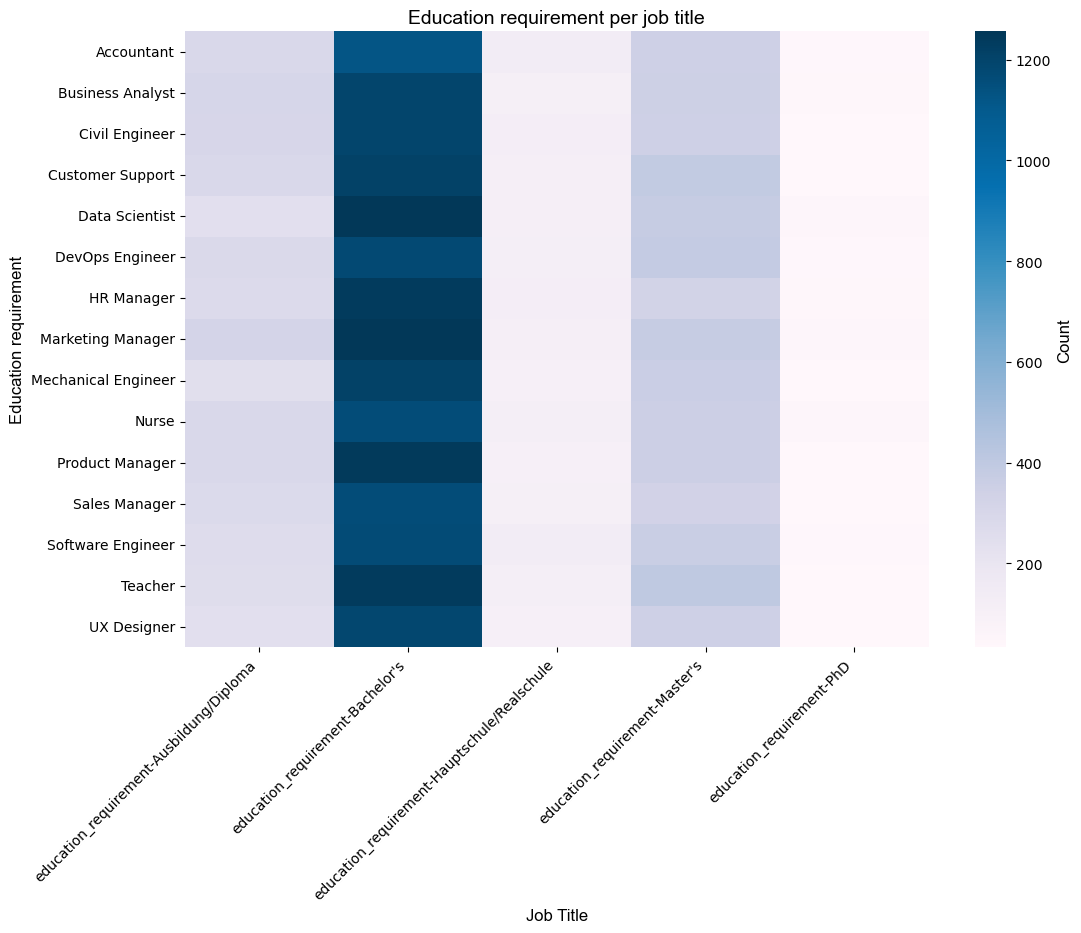

In [53]:
# Plot heatmap education_requirement 
plt.figure(figsize=(12,8))
ax= sns.heatmap(education_counts, cmap='PuBu', annot=False, fmt=".0f")
plt.title("Education requirement per job title", fontsize=14, fontname='Arial')
plt.xlabel("Job Title", fontsize=12, fontname='Arial')
plt.ylabel("Education requirement", fontsize=12, fontname='Arial')
plt.xticks(rotation=45, ha='right')

# adding scale label 
colorbar = ax.collections[0].colorbar
colorbar.set_label("Count", fontsize=12, fontname='Arial')

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\Education requirement heatmap.png",
            dpi=600, bbox_inches='tight')
plt.show()


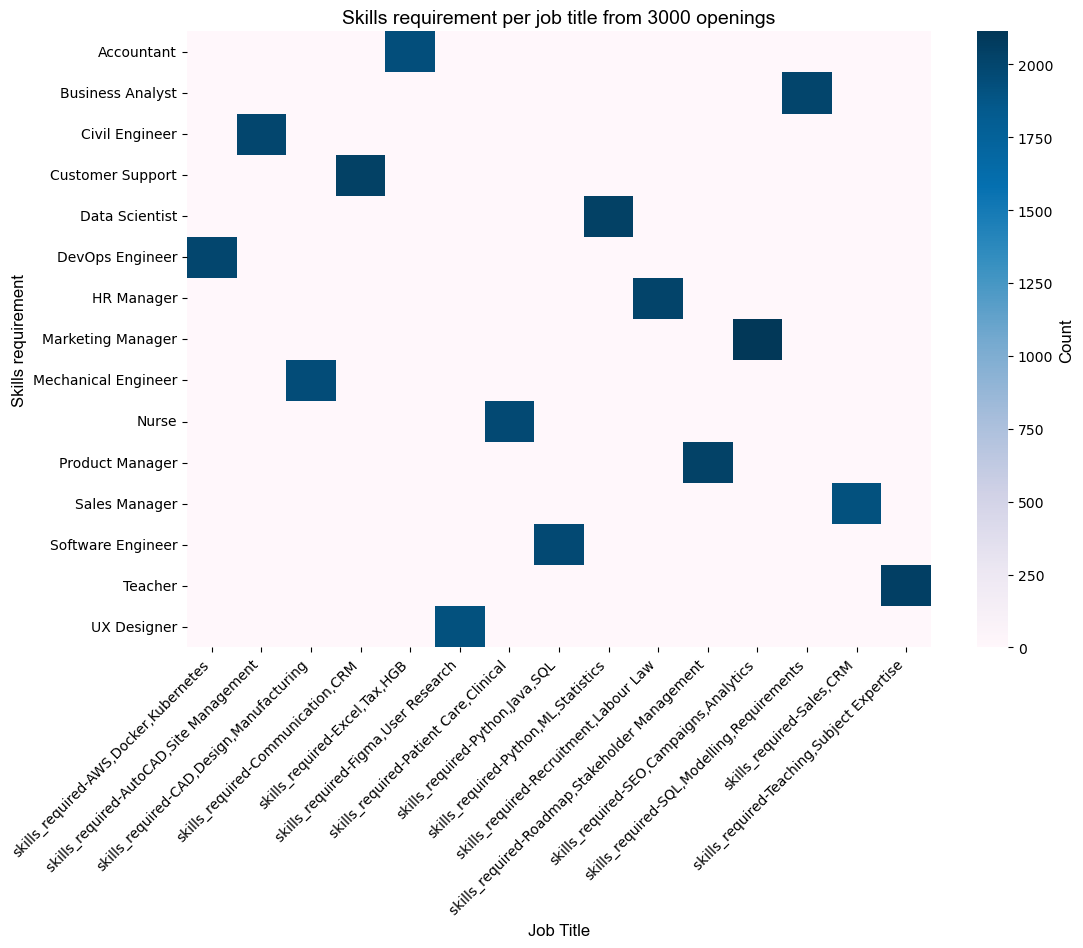

In [54]:
# Plot heatmap skills_requirement by industry 
plt.figure(figsize=(12,8))
ax= sns.heatmap(skills_counts, cmap='PuBu', annot=False, fmt=".0f")
plt.title("Skills requirement per job title from 3000 openings", fontsize=14, fontname='Arial')
plt.xlabel("Job Title", fontsize=12, fontname='Arial')
plt.ylabel("Skills requirement", fontsize=12, fontname='Arial')
plt.xticks(rotation=45, ha='right')

# adding scale label 
colorbar = ax.collections[0].colorbar
colorbar.set_label("Count", fontsize=12, fontname='Arial')

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\Skills requirement heatmap.png",
            dpi=600, bbox_inches='tight')
plt.show()


### Remote availibility influence on median salary offers

C:\Users\analy\AppData\Local\Temp\ipykernel_25412\823887154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


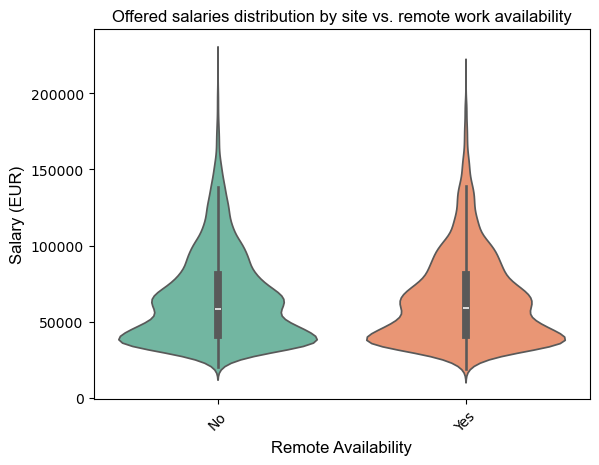

In [12]:
# Create violin plot of offered median salaries by remote availability
sns.violinplot(
    x="remote_availability", 
    y="salary_median_eur", 
    data=Jobmarket02, 
    inner="box",   # shows a mini boxplot inside the violin
    palette="Set2" 
)

# Title and axis labels with Arial, black, size 12
plt.title("Offered salaries distribution by site vs. remote work availability", 
          fontsize=12, fontname='Arial', color='black')
plt.xlabel("Remote Availability", fontsize=12, fontname='Arial', color='black')
plt.ylabel("Salary (EUR)", fontsize=12, fontname='Arial', color='black')
plt.xticks(rotation=45)

# Save plot
plt.savefig(r"C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\Salaries_remotwork_violinplot.png",
            dpi=600, bbox_inches='tight')

# Show plot
plt.show()
